# Stochastic Block Model Application to weighted MRI Connectomes

# Setting

## Task

Given: 

+ $n$ samples of diffusion connectomes, $D = \left\{d_i\right\}_{i=1}^n$ where $d_i  = (E, V, w)$ for $|V|$ regions of interest and $w(v_i, v_j) = w_{ij} \in [0, 1]$.
+ $m$ samples of functional connectomes, $F = \left\{f_i\right\}_{i=1}^m$ where $f_i = (E, V, w)$ for $|V|$ regions of interest and $w(v_i, v_j) = w_{ij} \in [0, 1]$.
+ a partitioning of the vertices into $C_1$, the left hemisphere ROIs, and $C_2$, the right hemisphere ROIs, where $C_1 \cup C_2 = V$.

Determine if there exists a difference in the connectivity among the vertices in $C_1$ and $C_2$ within a particular modality, and between the communities $C_1$ and $C_2$, for the functional vs diffusion connectomes. 

## Statistical Model

1) Assume we have a random variable $A$ which can be characterized by the Stochastic Block Model with parameter $B$:

\begin{align*}
	A \sim SBM(B)
\end{align*}

Under the Stochastic Block Model, the parameter $B$ can be shown to be estimated by:

\begin{align*}
	\hat{B} &\sim \mathcal{N}\left(\mu_B, \Sigma_B\right) \\
    \mu_B &= \begin{bmatrix}
    	p_i \\
        p_c
    \end{bmatrix} \\
    \Sigma_C &= \begin{bmatrix}
    	\frac{p_i(1 - p_i)}{\left(\frac{n}{2}\right)^2} & 0 \\
        0 & \frac{p_c(1 - p_c)}{\left(\frac{n}{2}\right)^2}
    \end{bmatrix}
\end{align*}

where $p_i$ represents the probability of a ipsi-lateral connection, and $p_c$ the probability of a contra-lateral connection. Then given the connectome megamean as an adjacency matrix $M \in \left\{0, 1\right\}^{n \times n}$ with $n$ vertices, we can compute $p_i$ and $p_c$ as follows:

\begin{align*}
	I &= \left\{(i, j): \textrm{vertex $i$ and vertex $j$ are in the same hemisphere}\right\} \\
	C &= \left\{(i, j): \textrm{vertex $i$ and vertex $j$ are not in the same hemisphere}\right\} \\
    p_i &= \frac{1}{|I|} \sum_{(i, j) \in I} M_{ij} \\
    p_c &= \frac{1}{|C|} \sum_{(i, j) \in C} M_{ij}
\end{align*}

giving us a realization $Z$ of our SBM-distributed RV $A$.

2) Given the following random variables $D, F$:

\begin{align*}
    D &\sim \mathcal{N}\left(\mu_D, \Sigma_D\right) \\
    \mu_D &= \begin{bmatrix}D_{11} \\ D_{12} \\ D_{22}\end{bmatrix} \\
    \Sigma_D &= \begin{bmatrix}
    \frac{D_{11}(1 - D_{11})}{\begin{pmatrix}n \\ 2\end{pmatrix}} & 0 & 0 \\
    0 & \frac{D_{12}(1 - D_{12})}{\left(\frac{n}{2}\right)^2} & 0 \\
    0 & 0 & \frac{D_{22}(1 - D_{22})}{\begin{pmatrix}n \\ 2\end{pmatrix}}
    \end{bmatrix}
\end{align*}

\begin{align*}
    F &\sim \mathcal{N}\left(\mu_F, \Sigma_F\right) \\
    \mu_F &= \begin{bmatrix}F_{11} \\ F_{12} \\ F_{22}\end{bmatrix} \\
    \Sigma_F &= \begin{bmatrix}
    \frac{F_{11}(1 - F_{11})}{\begin{pmatrix}n \\ 2\end{pmatrix}} & 0 & 0 \\
    0 & \frac{F_{12}(1 - F_{12})}{\left(\frac{n}{2}\right)^2} & 0 \\
    0 & 0 & \frac{F_{22}(1 - F_{22})}{\begin{pmatrix}n \\ 2\end{pmatrix}}
    \end{bmatrix}
\end{align*}

## Statistical Goal

1) with $H_0: p_I <= p_C$, $H_A: p_I > p_C$, determine determine $\mathbb{P}(\textrm{reject $H_0$ in favor of $H_A$ | $H_0$ is true})$. That is, determine the probability of incorrectly rejecting the null hypothesis that the connectivity across hemisphere is less than the connectivity within hemisphere. 

2) with $H_0: \mu_D = \mu_F$, $H_A: \mu_D \neq \mu_F$, determine $\mathbb{P}(\textrm{reject $H_0$ in favor of $H_A$ | $H_0$ is true})$. That is, determine the probability that the connectivity in the diffusion connectomes differs from the connectivity in the functional connectomes under a weighted SBM framework.

## Test Statistic

1) [Welch's T-Test](https://en.wikipedia.org/wiki/Welch%27s_t-test) for testing whether populations have equal means given that they have different variances in the univariate case.

\begin{align*}
    T = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
\end{align*}

Since our random variables are all assumed to be independent, we can assume that $s_1 = \Sigma_{11}$, and $s_2 = \Sigma_{22}$.

and the degrees of freedom can be calculated as follows:

\begin{align*}
    \nu &= \frac{\left(\frac{s_I^2}{n_1} + \frac{s_C^2}{n_2}\right)^2}{\frac{s_1^4}{n_1^2 \nu_1} + \frac{s_2^4}{n_2^2\nu_2}}
\end{align*}

where the standard deviation $s_j = \sqrt{\frac{p_j(1 - p_j)}{\left(\frac{n}{2}\right)^2}}$

where $\nu_1 = n_1 - 1, \; \nu_2 = n_2 - 1$.

We can then use a one-sided test given $T, \nu$ to get a $p-$ value.

2)

## P-Value

1) We can compute a p-value of falsely rejecting the null hypothesis by simply finding the area:

\begin{align*}
    p = \int_{-T_{observed}}^{\infty}p(x, df) dx = 1 - \int_{-\infty}^{T_{observed}} p(x, df) dx
\end{align*}

where $p(x, df)$ is the pdf for the $T$ distribution with degrees of freedom $df$.

## Statistical Power

1) The statistical power can be computed as the inverse of the probability of making a Type II ($\beta$) error. A type II error can be defined as follows:

\begin{align*}
    \beta = \mathbb{P}(\textrm{reject $H_A$ in favor of $H_0$ | $H_A$ is true}) = \mathbb{P}(T_{observed} > T_{critical})
\end{align*}

where $T_{critical}$ is the test-statistic at the given level of significance $\alpha$ specified by our test. Then the power is:

\begin{align*}
    1 - \beta = 1 - \int_{T_{critical}}^{T_{observed}}p(x, df) dx
\end{align*}


## Data

### Raw Data

For the data, we compute the weighted mean functional (rank of each edge) and diffusion (number of fibers). For the functional connectome, we threshold such that the largest 50% of edges are set to connected, and the smallest 50% set to disconnected. For the diffusion (which are natively sparse) we just threshold edges that are present to connected, and edges that are not present to disconnected (threshold about 0). 

In [1]:
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


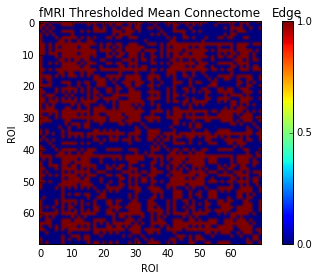

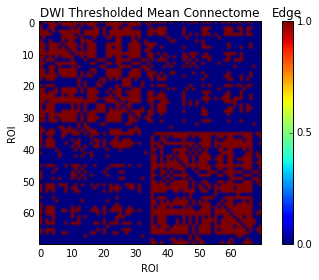

In [2]:
%matplotlib inline
basepath = '/data/connectome_stats/'
fmri_mean = nx.read_weighted_edgelist(os.path.join(basepath, 'fmrimean_1709.edgelist'))
dwi_mean = nx.read_weighted_edgelist(os.path.join(basepath, 'dwimean_2861.edgelist'))

nodes = np.array(fmri_mean.nodes())
argsort = np.argsort(nodes.astype(int))
fmrimean_mtx = nx.to_numpy_matrix(fmri_mean, nodelist=nodes[argsort].tolist())
dwimean_mtx = nx.to_numpy_matrix(dwi_mean, nodelist=nodes[argsort].tolist())



def plot_connectome(mtx, title, xlabel, ylabel, cbart, rd=1.0, fmin=None, fmax=None, tickvals=None, ticks=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.imshow(mtx, vmin=fmin, vmax=fmax)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    if (fmin == None):
        fmin = np.ceil(np.min(mtx)/rd)*rd
    if (fmax == None):
        fmax = np.floor(np.max(mtx)/rd)*rd
    if ticks is not None:
        ax.set_xticks(tickvals)
        ax.set_xticklabels(ticks)
        ax.set_yticks(tickvals)
        ax.set_yticklabels(ticks)
    cbar = fig.colorbar(cax, ticks=[fmin, (fmin+fmax)/2.0, fmax])
    cbar.ax.set_title(cbart)
    fig.tight_layout()
    return fig

fmri_thresh = np.zeros(fmrimean_mtx.shape)
midpoint = np.percentile(fmrimean_mtx.flatten(), 50)
fmri_thresh[fmrimean_mtx >= midpoint] = 1
fmri_thresh[fmrimean_mtx < midpoint] = 0

fig1 = plot_connectome(fmri_thresh, 'fMRI Thresholded Mean Connectome', 'ROI', 'ROI', 'Edge')
fig1.show()


dwi_thresh = np.zeros(dwimean_mtx.shape)
dwi_thresh[dwimean_mtx > 0] = 1
dwi_thresh[dwimean_mtx <= 0] = 0

fig2 = plot_connectome(dwi_thresh, 'DWI Thresholded Mean Connectome', 'ROI', 'ROI', 'Edge')
fig2.show()

### Blocked Data

here, we will compute the probability of an edge existing in each of 4 quadrants (2 ipsilateral quadrants; 2 contralateral quadrants):

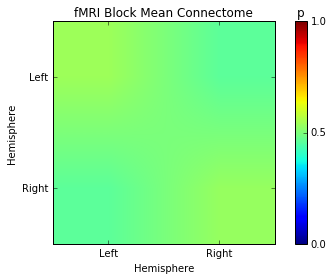

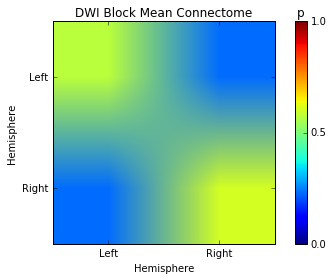

In [3]:
lh = np.arange(0, 35)
rh = np.arange(35, 70)
fmri_blockmean = np.zeros((2, 2))
fmri_blockstd = np.zeros((2, 2))
dwi_blockmean = np.zeros((2, 2))
dwi_blockstd = np.zeros((2, 2))

for i, h1 in enumerate([lh, rh]):
    for j, h2 in enumerate([lh, rh]):
        fmri_blockmean[i, j] = np.nanmean(fmri_thresh[i*35:(i+1)*35, j*35:(j+1)*35])
        fmri_blockstd[i, j] = np.nanstd(fmri_thresh[i*35:(i+1)*35, j*35:(j+1)*35])
        dwi_blockmean[i, j] = np.nanmean(dwi_thresh[i*35:(i+1)*35, j*35:(j+1)*35])
        dwi_blockstd[i, j] = np.nanstd(dwi_thresh[i*35:(i+1)*35, j*35:(j+1)*35])

ticks = ['Left', 'Right']
tickvals = [0, 1]
fig1 = plot_connectome(fmri_blockmean, 'fMRI Block Mean Connectome', 'Hemisphere', 'Hemisphere', 'p', ticks=ticks, tickvals=tickvals, fmin=0, fmax=1)
fig1.show()

fig2 = plot_connectome(dwi_blockmean, 'DWI Block Mean Connectome', 'Hemisphere', 'Hemisphere', 'p', ticks=ticks, tickvals=tickvals, fmin=0, fmax=1)
fig2.show()

# Difference in Ipsilateral vs. Contralateral Connectivity

Here, we aggregate all of the edge weights ipsilaterally and contralaterally, along with the number of edges this information is aggregated over for each connection type. We feed this into a simple t-test with the appropriate assumptions (unequal variance, goal is to test for ipsilateral connectivity exceeding contralateral connectivity):

## Functional


In [4]:
from scipy.stats import norm, t, ttest_ind
from math import factorial


def nCr(n, k):
    """
    Computes C(n, k) = (n!)/(k!(n-k)!)
    """
    return factorial(n)/float(factorial(k)*factorial(n - k))


def one_sided_ttest(a, b):
    """
    Performs a one-sided ttest given 
    """
    # compute the means of each side
    u1 = np.nanmean(a)
    u2 = np.nanmean(b)
    # compute the number of observations of each
    n1 = np.prod(a.shape)
    n2 = np.prod(b.shape)
    # standard-deviation according to Minh's result
    s1 = np.sqrt((u1*(1 - u1))/(n1^2))
    s2 = np.sqrt((u2*(1 - u2))/(n2^2))
    # test-statistic is welch t-test
    T = (u1 - u2)/np.sqrt((s1**2/float(n1)) + (s2**2/float(n2)))
    # degrees of freedom according to welch
    dfnum = ((s1**2)/float(n1) + (s2**2)/float(n2))**2
    dfdenom = (s1**4/float(n1**2*(n1 - 1)) + s2**4/float(n2**2*(n2 - 1)))
    df = dfnum/float(dfdenom)
    p = np.float64(1) - np.float64(t.cdf(T, df))
    return(T, df, p)

# all the ipsilateral connections in one array
fips = np.vstack((fmri_thresh[0:35, 0:35], fmri_thresh[35:70, 35:70])).flatten()
# all the contralateral connections in another array
fcon = np.vstack((fmri_thresh[35:70, 0:35], fmri_thresh[0:35, 35:70])).flatten()

test, df, pval = one_sided_ttest(fips, fcon)
print("Test Statistic: {} with {} degrees of freedom".format(test, df))
print("P-value: {}".format(pval))

Test Statistic: 269.402216591 with 4898.0 degrees of freedom
P-value: 0.0


## Diffusion

In [5]:
dips = np.vstack((dwi_thresh[0:35, 0:35], dwi_thresh[35:70, 35:70])).flatten()
dcon = np.vstack((dwi_thresh[35:70, 0:35], dwi_thresh[0:35, 35:70])).flatten()

test, df, pval = one_sided_ttest(dips, dcon)
print("Test Statistic: {} with {} degrees of freedom".format(test, df))
print("P-value: {}".format(pval))

Test Statistic: 1360.49546336 with 4790.5590205 degrees of freedom
P-value: 0.0


As we can see above, both the functional and diffusion connectomes have a significant difference in the mean ipsilateral vs. contralateral connectivity under the model specified above, with a p-value of 0 of falsely rejecting the null hypothesis. 